In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [169]:
Length = 0.1 # cm
density = 1.05 
trap = 0.042
lambda_3HF = 319 # mm

In [44]:
def dE_over_dx(P,m,z=1, Z=7, A=13):
    k = 0.3071
    E_2 = P**2+m**2
    gamma_2 = E_2/m**2
    beta_2 = (gamma_2-1)/gamma_2
    Tmax = 0.225
    I = 12.4e-6*Z
    term1 = k*z**2*(Z/A)/beta_2
    term2 = 0.5*np.log(2*0.511*(gamma_2-1)*Tmax/I**2)
    term3 = term2-beta_2
    result = term1*term3
    return result

In [36]:
k = 0.3071
z = 1
gamma = 4
gamma_2 = gamma**2
beta_2 = (gamma_2-1)/gamma_2
print(np.sqrt(beta_2), np.sqrt(gamma_2), np.sqrt(gamma_2-1))
Tmax = 0.225
I = 12.4*7e-6
term1 = k*z**2*0.5/beta_2
term2 = 0.5*np.log(2*0.511*(gamma_2-1)*Tmax/(I**2))
term3 = term2-beta_2
result = term1*term3
result

0.9682458365518543 4.0 3.872983346207417


1.479563961573431

In [20]:
k = 0.3071
z = 1
p = 50
m = 105
E = np.sqrt(p**2+m**2)
gamma = E/m
gamma_2 = gamma**2
beta_2 = (gamma_2-1)/gamma_2
beta = np.sqrt(beta_2)
beta, gamma

(0.4299335803923476, 1.1075907952012387)

In [39]:
dE_over_dx(P=50, m=139)

0.33847974074909665 1.0627289817102215 0.3597122302158272


10.79610575627558

Text(0.5, 1.0, '$\\mu$')

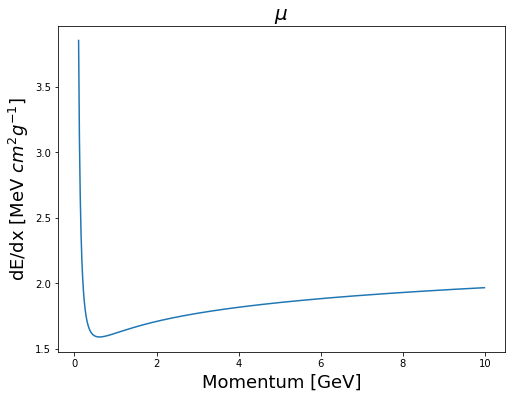

In [159]:
p_mu = np.arange(100,10000,10)
Epos_mu = dE_over_dx(p_mu, m=139)
plt.figure(figsize=(8,6))
plt.plot(p_mu/1000, Epos_mu)
plt.xlabel(r'Momentum [GeV]', fontsize=18)
plt.ylabel(r'dE/dx [MeV $cm^{2}$$g^{-1}$]', fontsize=18)
plt.title('$\mu$', fontsize=20)

Text(0.5, 1.0, '$\\mu$')

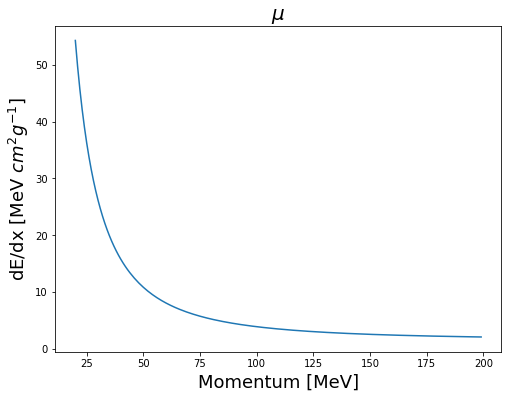

In [99]:
plt.figure(figsize=(8,6))
p_mu_comet = np.arange(20,200,1)
Epos_mu_comet = dE_over_dx(p_mu_comet, m=139)
plt.plot(p_mu_comet, Epos_mu_comet)
plt.xlabel(r'Momentum [MeV]', fontsize=18)
plt.ylabel(r'dE/dx [MeV $cm^{2}$$g^{-1}$]', fontsize=18)
plt.title('$\mu$', fontsize=20)

In [65]:
Epos_mu_comet.min()

2.043041947635019

(2.0, 12.0)

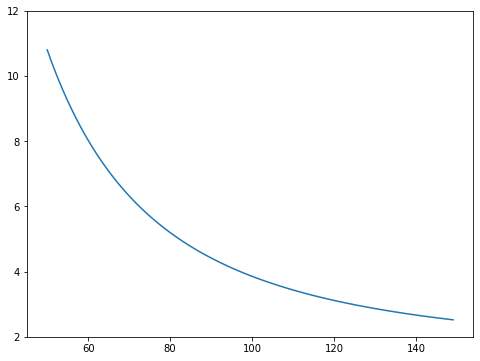

In [98]:
plt.figure(figsize=(8,6))
p_mu_comet = np.arange(50,150,1)
Epos_mu_comet = dE_over_dx(p_mu_comet, m=139)
plt.plot(p_mu_comet, Epos_mu_comet)
# plt.xlabel('Momentum [MeV], fontsize=18')
# plt.ylabel(r'dE/dx [MeV $cm^{2}$$g^{-1}$]', fontsize=18)
plt.ylim(2,12)
# plt.title('$\mu$', fontsize=20)

Text(0.5, 1.0, 'e')

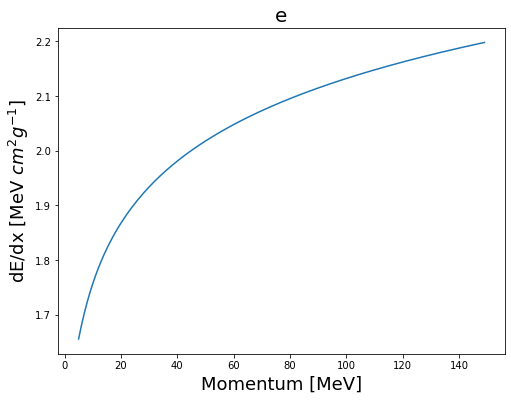

In [101]:
plt.figure(figsize=(8,6))
p_e_comet = np.arange(5,150,1)
Epos_e_comet = dE_over_dx(p_e_comet, m=0.511)
plt.plot(p_e_comet, Epos_e_comet)
plt.xlabel(r'Momentum [MeV]', fontsize=18)
plt.ylabel(r'dE/dx [MeV $cm^{2}$$g^{-1}$]', fontsize=18)
plt.title('e', fontsize=20)

Text(0.5, 1.0, 'e')

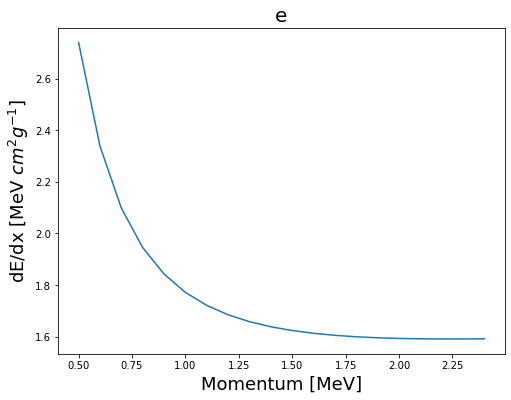

In [179]:
plt.figure(figsize=(8,6))
p_e_air = np.arange(0.5,2.5,0.1)
Epos_e_air = dE_over_dx(p_e_air, m=0.511)
plt.plot(p_e_air, Epos_e_air)
plt.xlabel(r'Momentum [MeV]', fontsize=18)
plt.ylabel(r'dE/dx [MeV $cm^{2}$$g^{-1}$]', fontsize=18)
plt.title('e', fontsize=20)

Text(0.5, 1.0, '$\\pi$')

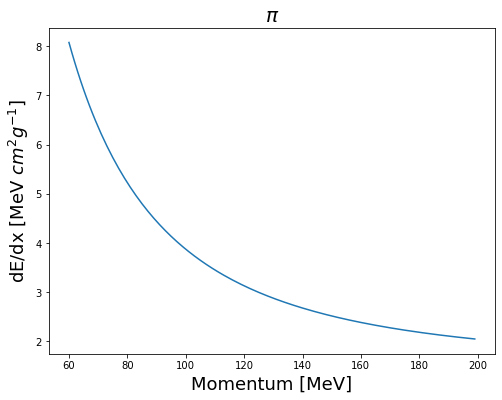

In [102]:
plt.figure(figsize=(8,6))
p_pi_comet = np.arange(60,200,1)
Epos_pi_comet = dE_over_dx(p_pi_comet, m=139.6)
plt.plot(p_pi_comet, Epos_pi_comet)
plt.xlabel(r'Momentum [MeV]', fontsize=18)
plt.ylabel(r'dE/dx [MeV $cm^{2}$$g^{-1}$]', fontsize=18)
plt.title('$\pi$', fontsize=20)

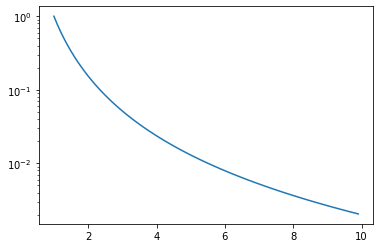

In [128]:
E_mu = np.arange(1,10,0.1)
Flux_mu = E_mu**(-2.7)
plt.plot(E_mu, Flux_mu)
plt.yscale('log')
# plt.xscale('log')

In [150]:
def mu_distribute(E, Emin=1, Emax=10):
    fmin = Emin**(-2.7)
    fmax = Emax**(-2.7)
    scale = np.abs(1/(fmin-fmax))
    f = E**(-2.7)
    fp = (f-fmax)*scale
    prob = np.random.uniform(0,1,len(E))
#     print(scale, fp, prob)
    E =  E*(fp>prob)
    return E[E>0]

(array([398., 110.,  34.,  19.,  14.,  11.,  11.,   2.,   3.,   1.]),
 array([1.00032975, 1.81088272, 2.62143569, 3.43198866, 4.24254163,
        5.0530946 , 5.86364757, 6.67420054, 7.48475351, 8.29530648,
        9.10585945]),
 <a list of 10 Patch objects>)

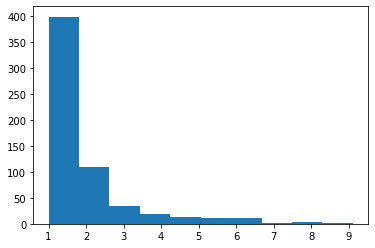

In [151]:
plt.hist(mu_distribute(np.random.uniform(1,10,10000)))

In [152]:
E_mu_seed = np.random.uniform(1,10,1000000)
E_mu = mu_distribute(E_mu_seed)

Text(0.5, 0, 'Energy [GeV]')

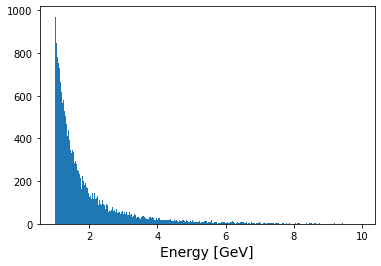

In [207]:
plt.hist(E_mu, bins=1000)
plt.xlabel('Energy [GeV]', fontsize=14)

In [158]:
E_mu.shape[0]

62340

In [165]:
Epos_mu = dE_over_dx(E_mu*1000, m=139)*Length*density

Text(0.5, 0, 'E')

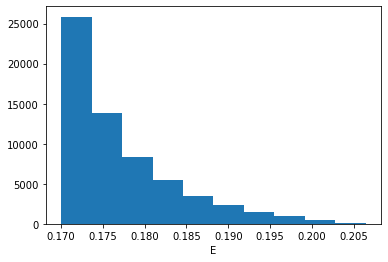

In [194]:
plt.hist(Epos_mu)
plt.xlabel('E')

In [168]:
def Abso_L(L, lambda_=319):
    return np.exp(-L/lambda_)

In [204]:
L_init = np.random.uniform(0,60,E_mu.shape[0])
L_decay = np.exp(-L_init/lambda_3HF)
L_decay

array([0.83482123, 0.9355024 , 0.90924875, ..., 0.89931139, 0.97484528,
       0.87181417])

In [205]:
Npe = E_pos*9500*trap*L_decay*0.35
Npe

array([20.45229446, 22.39390198, 23.0416727 , ..., 23.50770542,
       23.55657722, 21.83678171])

Text(0.5, 1.0, 'Cosmic muon')

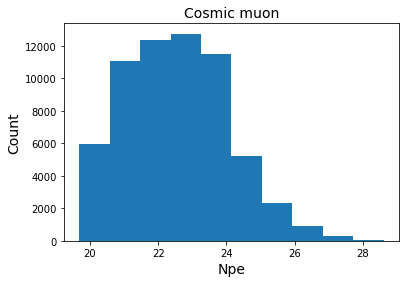

In [206]:
plt.hist(Npe)
plt.xlabel('Npe', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Cosmic muon', fontsize=14)

In [191]:
E_mu_comet = np.random.uniform(50,150,100000)
Epos_mu_comet = dE_over_dx(E_mu_comet, m=139)*Length*density
Epos_mu_comet

array([0.616107  , 0.6108502 , 0.32822043, ..., 0.48672432, 0.87772894,
       0.26770318])

In [185]:
L_init_comet = np.random.uniform(15,30,E_mu_comet.shape[0])
L_decay_comet = np.exp(-L_init_comet/lambda_3HF)
Npe_comet = Epos_mu_comet*9500*trap*L_decay_comet*0.35

Text(0.5, 1.0, 'COMET muon')

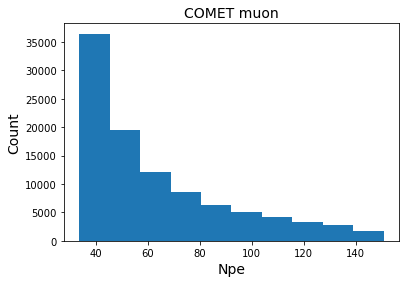

In [193]:
plt.hist(Npe_comet)
plt.xlabel('Npe', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('COMET muon', fontsize=14)

(array([10011., 10038., 10173., 10329., 10044.,  9787., 10039., 10088.,
         9803.,  9688.]),
 array([0.91024292, 0.9146252 , 0.91900749, 0.92338977, 0.92777206,
        0.93215435, 0.93653663, 0.94091892, 0.94530121, 0.94968349,
        0.95406578]),
 <a list of 10 Patch objects>)

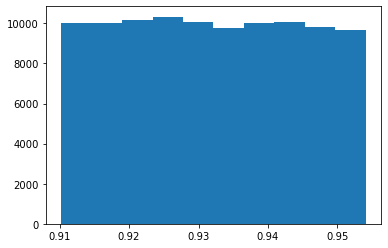

In [190]:
plt.hist(L_decay_comet)